<a href="https://colab.research.google.com/github/JSJeong-me/SEMICON-BigData/blob/main/statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

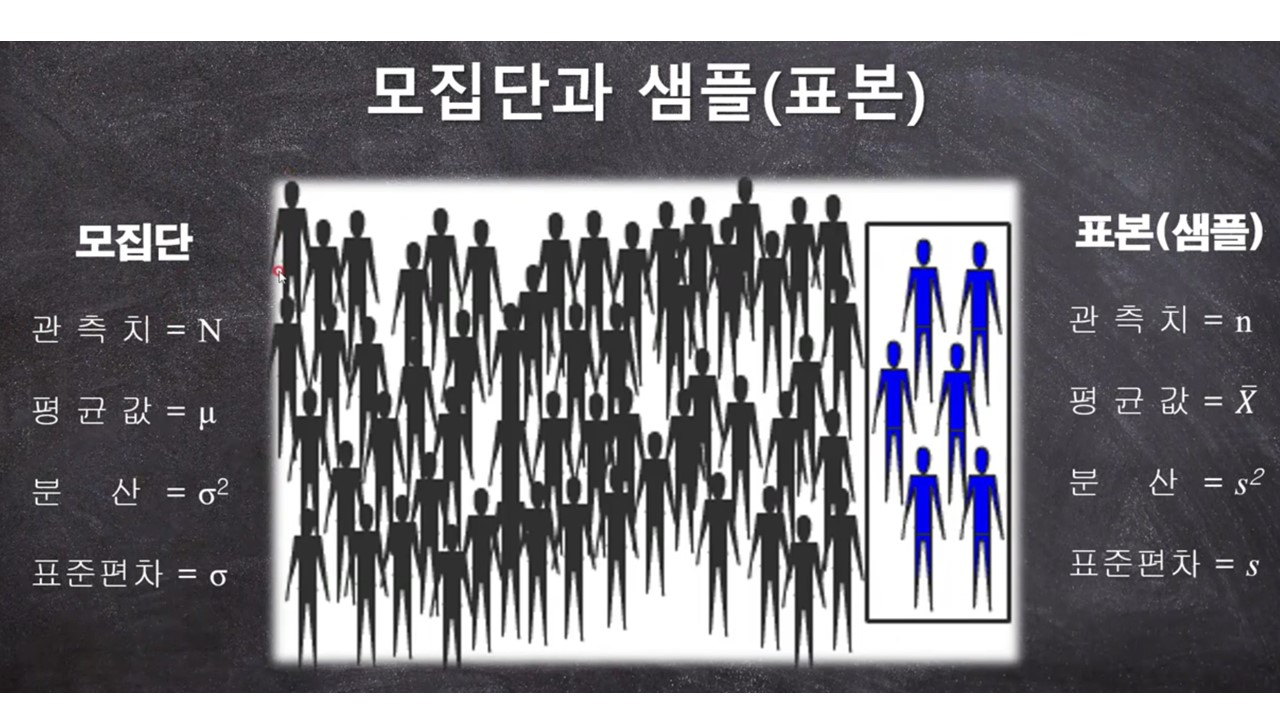

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

In [2]:
path = "./data/"

In [3]:
# 데이터 불러오기
ds_mycars = pd.read_csv(path+"mycars.csv")

In [26]:
ds_mycars.head()

manufacturer model  displacement  year  cylinder automatic driving  mpg  \
0         audi    a4           1.8  1999         4      auto       f   18   
1         audi    a4           1.8  1999         4    manual       f   21   
2         audi    a4           2.0  2008         4    manual       f   20   
3         audi    a4           2.0  2008         4      auto       f   21   
4         audi    a4           2.8  1999         6      auto       f   16   

   highway_mileage fuel    class  
0               29    p  compact  
1               29    p  compact  
2               31    p  compact  
3               30    p  compact  
4               26    p  compact

In [4]:
df = ds_mycars[['model','mpg']]
# 모델별 기술통계량 표시
df.groupby('model').describe()

mpg                                                 \
                       count       mean       std   min    25%   50%    75%   
model                                                                         
4runner 4wd              6.0  15.166667  0.752773  14.0  15.00  15.0  15.75   
a4                       7.0  18.857143  1.864454  16.0  18.00  18.0  20.50   
a4 quattro               8.0  17.125000  1.807722  15.0  15.75  17.0  18.25   
a6 quattro               3.0  16.000000  1.000000  15.0  15.50  16.0  16.50   
altima                   6.0  20.666667  1.966384  19.0  19.00  20.0  22.50   
c1500 suburban 2wd       5.0  12.800000  1.303840  11.0  12.00  13.0  14.00   
camry                    7.0  19.857143  1.463850  18.0  18.50  21.0  21.00   
camry solara             7.0  19.857143  1.772811  18.0  18.00  21.0  21.00   
caravan 2wd             11.0  15.818182  1.834022  11.0  15.50  16.0  17.00   
civic                    9.0  24.444444  1.943651  21.0  24.00  24.0  25.00   
corolla                  5.0  25.600000  1.673320  24.0  24.00  26.0  26.00   
corvette                 5.0  15.400000  0.547723  15.0  15.00  15.0  16.00   
dakota pickup 4wd        9.0  12.777778  1.986063   9.0  11.00  14.0  14.00   
durango 4wd              7.0  11.857143  1.573592   9.0  11.00  13.0  13.00   
expedition 2wd           3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
explorer 4wd             6.0  13.666667  0.816497  13.0  13.00  13.5  14.00   
f150 pickup 4wd          7.0  13.000000  1.000000  11.0  13.00  13.0  13.50   
forester awd             6.0  18.833333  0.983192  18.0  18.00  18.5  19.75   
grand cherokee 4wd       8.0  13.500000  2.507133   9.0  12.50  14.0  15.00   
grand prix               5.0  17.000000  1.000000  16.0  16.00  17.0  18.00   
gti                      5.0  20.000000  2.000000  17.0  19.00  21.0  21.00   
impreza awd              8.0  19.625000  0.744024  19.0  19.00  19.5  20.00   
jetta                    9.0  21.222222  4.867694  16.0  19.00  21.0  21.00   
k1500 tahoe 4wd          4.0  12.500000  1.732051  11.0  11.00  12.5  14.00   
land cruiser wagon 4wd   2.0  12.000000  1.414214  11.0  11.50  12.0  12.50   
malibu                   5.0  18.800000  1.923538  17.0  18.00  18.0  19.00   
maxima                   3.0  18.666667  0.577350  18.0  18.50  19.0  19.00   
mountaineer 4wd          4.0  13.250000  0.500000  13.0  13.00  13.0  13.25   
mustang                  9.0  15.888889  1.452966  14.0  15.00  15.0  17.00   
navigator 2wd            3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
new beetle               6.0  24.000000  6.511528  19.0  20.00  20.5  27.00   
passat                   7.0  18.571429  1.902379  16.0  17.50  18.0  20.00   
pathfinder 4wd           4.0  13.750000  1.258306  12.0  13.50  14.0  14.25   
ram 1500 pickup 4wd     10.0  11.400000  1.505545   9.0  11.00  11.5  12.75   
range rover              4.0  11.500000  0.577350  11.0  11.00  11.5  12.00   
sonata                   7.0  19.000000  1.414214  18.0  18.00  18.0  20.00   
tiburon                  7.0  18.285714  1.603567  16.0  17.00  19.0  19.50   
toyota tacoma 4wd        7.0  15.571429  0.786796  15.0  15.00  15.0  16.00   

                              
                         max  
model                         
4runner 4wd             16.0  
a4                      21.0  
a4 quattro              20.0  
a6 quattro              17.0  
altima                  23.0  
c1500 suburban 2wd      14.0  
camry                   21.0  
camry solara            22.0  
caravan 2wd             18.0  
civic                   28.0  
corolla                 28.0  
corvette                16.0  
dakota pickup 4wd       15.0  
durango 4wd             13.0  
expedition 2wd          12.0  
explorer 4wd            15.0  
f150 pickup 4wd         14.0  
forester awd            20.0  
grand cherokee 4wd      17.0  
grand prix              18.0  
gti                     22.0  
impreza awd             21.0  
jetta     

## **평균 검정_모집단 표준편차를 모르는 경우=샘플링을 했다** 

In [5]:
# 데이터 불러오기
df = pd.read_csv(path+"data_norm.csv")

In [6]:
# 정규성 검정
x=stats.shapiro(df)
print('The Shapiro-Wilkis Statistic is %.3f and the p-value is %.3f' %x)

The Shapiro-Wilkis Statistic is 0.933 and the p-value is 0.480


In [7]:
# 1-Sample t-test
t_result = stats.ttest_1samp(df, 76.7)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("1-Sample t-test ")
print("t검정통계량 : {} ".format(t))
print("p-value : {} ".format(p))

1-Sample t-test 
t검정통계량 : [0.864] 
p-value : [0.41] 


In [8]:
# 데이터 불러오기
df1 = pd.read_csv(path+"data_sampt1.csv")
df2 = pd.read_csv(path+"data_sampt2.csv")

In [9]:
# 정규성 검정
x=stats.shapiro(df1)
print('Shapiro-Wilkis검정통계량은 %.3f, p-value는 %.3f' %x)

Shapiro-Wilkis검정통계량은 0.909, p-value는 0.062


In [10]:
# 등분산성 검정
stat, p = stats.bartlett(df1['sample'],df2['sample'])
print('등분산검정결과 p-value는 %.3f' % p)

등분산검정결과 p-value는 0.642


In [11]:
# 2-Sample t-test
t_result = stats.ttest_ind(df1['sample'], df2['sample'], equal_var = True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

In [12]:
print( "2-Sample t-test ")
print( "t검정통계량: {} " .format(t))
print( "p-value: {} " .format(p))

2-Sample t-test 
t검정통계량: -3.122 
p-value: 0.003 


In [13]:
# 데이터 불러오기
df = pd.read_csv(path+"data_pair.csv")

In [14]:
# paired t-test
t_result = stats.ttest_rel(df['before'], df['after'])
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

In [15]:
print( "Paired t-test ")
print( " t검정통계량 : {} " .format(t))
print( " p-value : {} " .format(p))

Paired t-test 
 t검정통계량 : -5.324 
 p-value : 0.0 


## **비율/분산 검정**

In [16]:
count = 15
nobs = 100
value = .1

# proportion test 실행
stat, pval = proportions_ztest(count, nobs, value)

In [17]:
print( "1 Proportion test ")
print( ' p검정통계량 : {0:0.3f}' .format(stat))
print( ' p-value : {0:0.3f}'.format(pval))

1 Proportion test 
 p검정통계량 : 1.400
 p-value : 0.161


## 결론: 결과적으로 전자제품 A에 대해 품질개선 결과 기존 대비 만족도의 차이가 있다고 할 수 없다.



In [18]:
count = np.array([4, 1])
nobs = np.array([1000, 1200])
# proportion test 실행

stat, pval = proportions_ztest(count, nobs)

In [19]:
print( "2 Proportion test ")
print( "p검정통계량 : {0:0.3f}".format(stat))
print( "p-value : {0:0.3f}".format(pval))

2 Proportion test 
p검정통계량 : 1.553
p-value : 0.120


## 분산 검정_Bartlett test

In [20]:
df = pd.read_csv(path+'data_var.csv')

In [21]:
# 등분산성 검정
stats.bartlett(df['A'],df['B'])

BartlettResult(statistic=0.2158392670118528, pvalue=0.6422286416307027)

## 결론: 유의수준 5%에서 검정결과 P값이 0.642이므로 고객간 고객 만족도의 분산은 차이가 없다.

## **카이제곱 검정**

In [22]:
# 데이터 불러오기
df = pd.read_csv(path+"data_chi.csv", encoding = "euc-kr")
# chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(df)

In [23]:
print( "chi-square test ")
print( ' chisq: {0:0.3f}' .format(chi))
print( ' p: {0:0.3f}'.format(pval))
print( ' degree pf freedom: {}' .format(dof))
print( ' expected value: \n{}' .format(expected.round(3)))

chi-square test 
 chisq: 13.366
 p: 0.038
 degree pf freedom: 6
 expected value: 
[[258.333 258.333 258.333]
 [276.333 276.333 276.333]
 [230.667 230.667 230.667]
 [234.667 234.667 234.667]]


## 결론: 공장별로 제품을 생산하는 부하 차이가 있다고 할 수 있다.

# **상관분석**

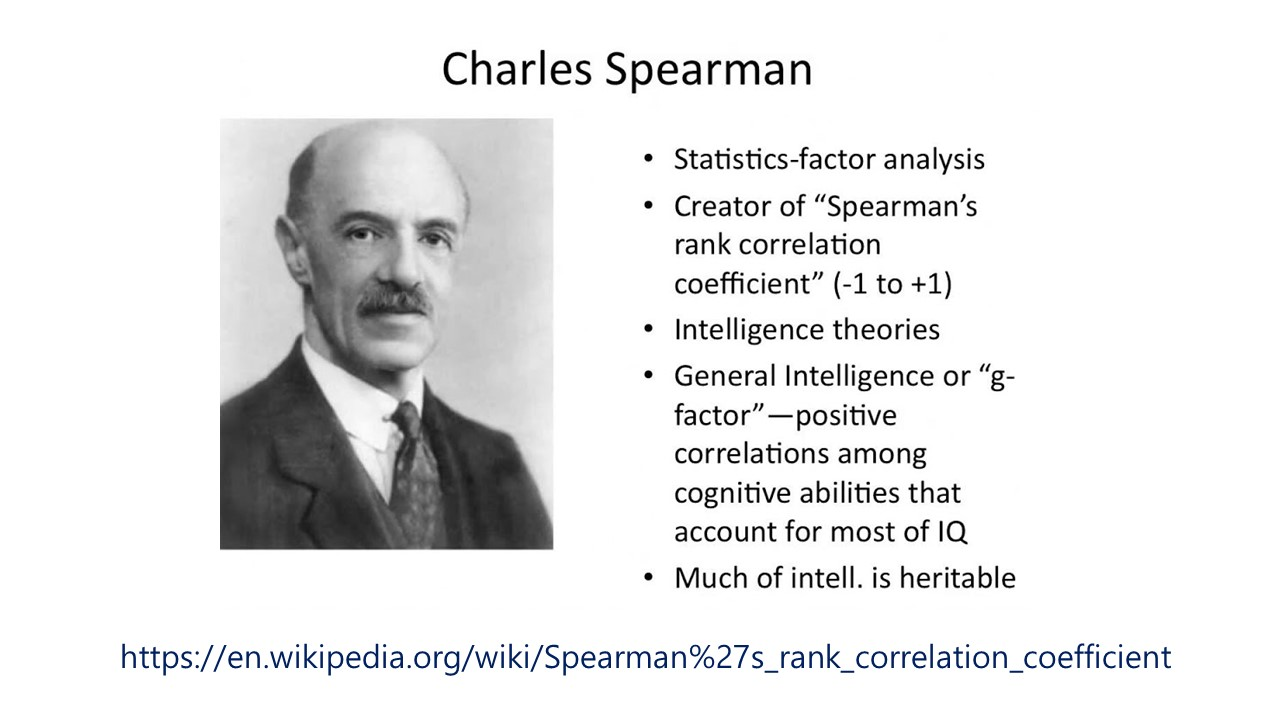

In [27]:
# 데이터 불러오기
df = pd.read_csv(path+"data_cor.csv")

df.head()

minutes  units
0        1     23
1        2     29
2        3     49
3        4     64
4        4     74

In [30]:
df.describe()

minutes       units
count  10.000000   10.000000
mean    4.600000   74.700000
std     2.221111   32.961425
min     1.000000   23.000000
25%     3.250000   52.750000
50%     4.500000   80.500000
75%     6.000000   96.750000
max     8.000000  119.000000

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   minutes  10 non-null     int64
 1   units    10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [28]:
# 피어슨 상관분석 실행
corr, pval = stats.pearsonr(df['minutes'], df['units'])

In [29]:
print( "Correlation Analysis ")
print( ' corr: {0:0.3f}' .format(corr))
print( ' p: {0:0.3f}'.format(pval))

Correlation Analysis 
 corr: 0.989
 p: 0.000


In [34]:
df.corr(method='pearson')

minutes     units
minutes  1.000000  0.989226
units    0.989226  1.000000

In [35]:
df.corr(method='spearman')

minutes     units
minutes  1.000000  0.993921
units    0.993921  1.000000

## 결론: 부품 수리시간과 부품 가지수간에 매우 강한 상관성이 있다고 할 수 있다.


## 따라서 두 개의 컬럼 중 한개를 없애거나, 두개의 평균값으로 사용하면 됨

In [32]:
import pandas_profiling

In [33]:
df.profile_report()

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## tips.csv도 분석해보자

In [37]:
df_tips = pd.read_csv('./data/tips.csv')

In [44]:
df_tips['tip_rate']= (df_tips['tip']/df_tips['total_bill'])*100

In [46]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        241 non-null    float64
 7   tip_rate    244 non-null    float64
dtypes: float64(4), object(4)
memory usage: 15.4+ KB


## total_bill, tip. size,  tip_rate만 분석 가능

In [47]:
df_tips.profile_report()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [49]:
df_tips.corr(method='spearman')

total_bill       tip      size  tip_rate
total_bill    1.000000  0.678968  0.598675 -0.320680
tip           0.678968  1.000000  0.454396  0.396186
size          0.598675  0.454396  1.000000 -0.163728
tip_rate     -0.320680  0.396186 -0.163728  1.000000

## total_bill이 늘어날수록 tip_rate는 작아지는 음의 상관관계

In [50]:
df_tips['sex'] = df_tips['sex'].replace({'Female':0, 'Male':1})

In [51]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int64  
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        241 non-null    float64
 7   tip_rate    244 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 15.4+ KB


In [52]:
df_tips.profile_report()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [53]:
df_tips.corr(method='spearman')

total_bill       tip       sex      size  tip_rate
total_bill    1.000000  0.678968  0.147717  0.598675 -0.320680
tip           0.678968  1.000000  0.055982  0.454396  0.396186
sex           0.147717  0.055982  1.000000  0.098674 -0.095906
size          0.598675  0.454396  0.098674  1.000000 -0.163728
tip_rate     -0.320680  0.396186 -0.095906 -0.163728  1.000000

## total_bill과 tip이 양의 선형인지, 음의 선형인지 판단

In [54]:
import seaborn as sns

In [55]:
df_tips.describe()

total_bill         tip         sex        size    tip_rate
count  244.000000  244.000000  244.000000  241.000000  244.000000
mean    19.785943    2.998279    0.643443    2.556017   16.080258
std      8.902412    1.383638    0.479967    0.947571    6.107220
min      3.070000    1.000000    0.000000    1.000000    3.563814
25%     13.347500    2.000000    0.000000    2.000000   12.912736
50%     17.795000    2.900000    1.000000    2.000000   15.476977
75%     24.127500    3.562500    1.000000    3.000000   19.147549
max     50.810000   10.000000    1.000000    6.000000   71.034483

In [57]:
df_tips.loc[:,["total_bill","tip"]]

total_bill   tip
0         16.99  1.01
1         10.34  1.66
2         21.01  3.50
3         23.68  3.31
4         24.59  3.61
..          ...   ...
239       29.03  5.92
240       27.18  2.00
241       22.67  2.00
242       17.82  1.75
243       18.78  3.00

[244 rows x 2 columns]

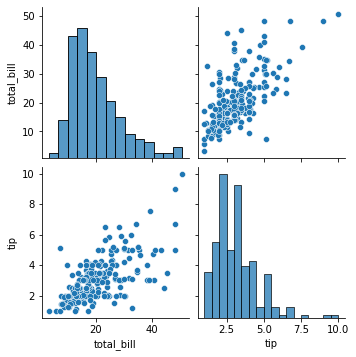

In [58]:
sns.pairplot(df_tips.loc[:,["total_bill","tip"]])

### 결론: total_bill과 tip이 양의 선형

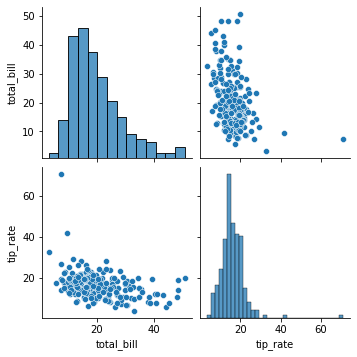

In [59]:
sns.pairplot(df_tips.loc[:,["total_bill","tip_rate"]])

### 결론: total_bill과 tip_rate는 양의 선형은 절대 아님

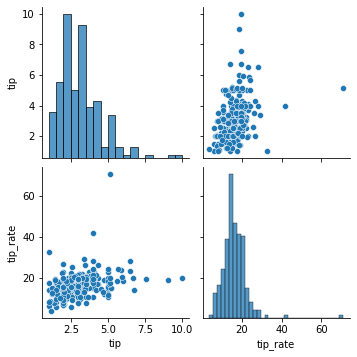

In [60]:
sns.pairplot(df_tips.loc[:,["tip","tip_rate"]])